In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Read file

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DATA PREPARATION /Final /train.csv', sep=';')
test = pd.read_csv('/content/drive/MyDrive/DATA PREPARATION /Final /test.csv', sep=';')

In [ ]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [ ]:
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [ ]:
train.loc[5537] #this is the maximum price in dataset

name             Volvo XC90 T8 Excellence BSIV
year                                      2017
selling_price                         10000000
km_driven                                30000
fuel                                    Petrol
seller_type                         Individual
transmission                         Automatic
owner                              First Owner
mileage                              42.0 kmpl
engine                                 1969 CC
max_power                              400 bhp
torque                          640Nm@ 1740rpm
seats                                        4
Name: 5537, dtype: object

In [ ]:
train = train.drop(5537)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 216.2+ KB


# Convert datatype

In [ ]:
# function to convert string columns to float
def convert_object_to_digit(dataframe, columns_to_convert, convert_type):
    copy_dataframe = dataframe.copy()
    for i in columns_to_convert:
        copy_dataframe[i] = pd.to_numeric(copy_dataframe[i].str.extract(r'(\d*\.\d+|\d+)', expand=False)).astype(convert_type)
    return copy_dataframe

In [ ]:
float_colums_to_convert = ['max_power', 'mileage', 'engine']
train = convert_object_to_digit(train, float_colums_to_convert, float)
test = convert_object_to_digit(test, float_colums_to_convert, float)

In [ ]:
train['name'] = train['name'].apply(lambda x:x.split()[0])
test['name'] = test['name'].apply(lambda x:x.split()[0])

In [ ]:
train_ = train.copy()
test_ = test.copy()

In [ ]:
pip install category_encoders

In [ ]:
#fill NaN values on train set
train['seats'] = train['seats'].fillna(train['seats'].mode()[0])
train.fillna(train.mean())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0
3,Hyundai,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591.0,121.30,154.9Nm@ 4200rpm,5.0
4,Volvo,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.00,998.0,66.10,90Nm@ 3500rpm,5.0
5996,Maruti,2018,390000,40000,CNG,Individual,Manual,First Owner,26.60,998.0,58.16,77Nm@ 3500rpm,5.0
5997,Tata,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.30,1199.0,84.00,114Nm@ 3500rpm,5.0
5998,Mahindra,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96,2523.0,63.00,180Nm@ 1440-1500rpm,9.0


In [ ]:
#fill NaN value on test set
test['seats'] = test['seats'].fillna(test['seats'].mode()[0])
test = test.fillna(test.mean())

In [ ]:
train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5999.000000,5.999000e+03,5.999000e+03,5840.000000,5840.000000,5844.000000,5999.000000
mean,2013.814302,6.372159e+05,6.997882e+04,19.384265,1464.270548,91.532422,5.418403
std,4.026859,7.976223e+05,5.189136e+04,4.044877,508.319777,35.758824,0.966409
min,1983.000000,3.000000e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.554995e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,6.523000e+06,1.500000e+06,33.440000,3604.000000,282.000000,14.000000


# EDA

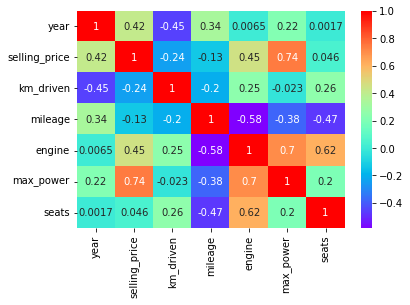

In [ ]:
#Find correlation between the columns presentd in dataset
correlation = train.corr()

sns.heatmap(correlation, annot = True, cmap = 'rainbow')

1. Here we can see that selling price and max power have the highest correlation of 0.85 .

2. Year and selling price are also having considerable correlation value of 0.41 .

*Find distribution of features*

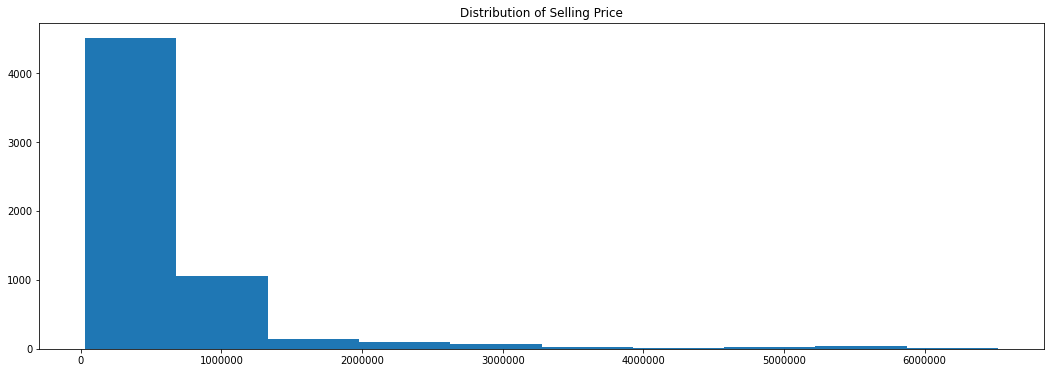

In [ ]:
plt.figure(figsize = (18,6))

plt.title('Distribution of Selling Price')
plt.hist(train['selling_price'])
plt.ticklabel_format(style = 'plain', axis ='x')
plt.show();

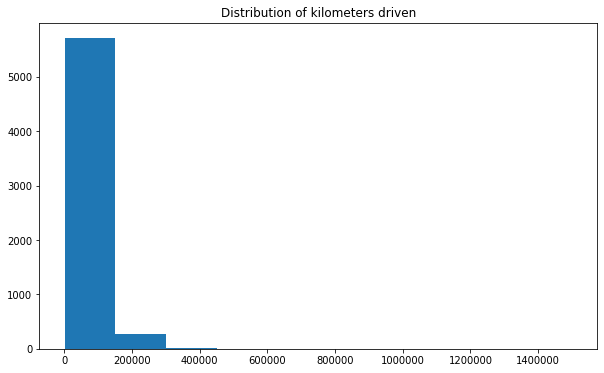

In [ ]:
plt.figure(figsize = (10,6))

plt.title('Distribution of kilometers driven')
plt.hist(train['km_driven'])
plt.ticklabel_format(style = 'plain', axis ='x')
plt.show();

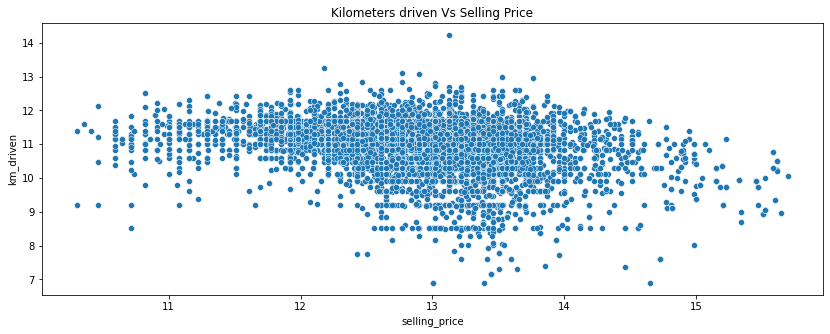

In [ ]:
plt.figure(figsize = (14,5))

sns.scatterplot(y = np.log(train['km_driven']), 
                x = np.log(train['selling_price']))

plt.title('Kilometers driven Vs Selling Price')

plt.show()

we can see that the frequency of values are higher for values 12 to 14 in the selling price ans 9 to 12 in kilometers driven.


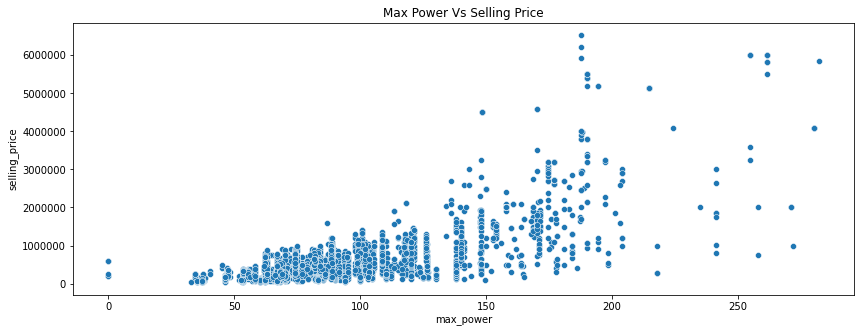

In [ ]:
plt.figure(figsize = (14,5))

sns.scatterplot(x = (train['max_power']), 
                y = (train['selling_price']))

plt.title('Max Power Vs Selling Price')
plt.ticklabel_format(style = 'plain', axis ='y')
plt.show()

there is a slight linear relationship between the two columns.

In [ ]:
#number of cars
brand = pd.DataFrame(train.groupby('name')['name'].count())
brand.rename(columns = {'name' : 'count'}, inplace = True)
brand = brand.reset_index().sort_values(by = 'count', ascending = False)
brand.head()

,name,count
20,Maruti,1792
11,Hyundai,1034
19,Mahindra,595
28,Tata,546
29,Toyota,366


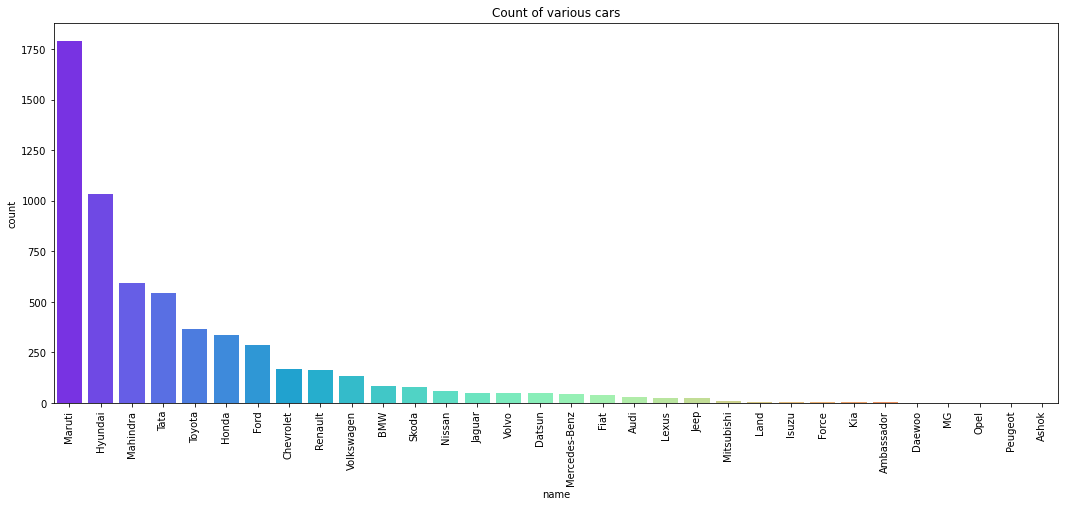

In [ ]:
plt.figure(figsize = (18, 7))

sns.barplot(x = 'name', y = 'count', data = brand, palette = 'rainbow')
_ = plt.xticks(rotation = 90, fontweight = 'light')
plt.title('Count of various cars')
plt.show()

 Maruti, Hyundai, Mahindra, Tata, Toyota etc are the top 5 cars that are available.


In [ ]:
avg_price = train.groupby('name')['selling_price'].agg(np.mean).reset_index().sort_values(by = 'selling_price', ascending = False)
avg_price.head()

,name,selling_price
17,Lexus,5.150000e+06
3,BMW,4.065783e+06
16,Land,3.608333e+06
31,Volvo,3.079082e+06
13,Jaguar,2.904885e+06


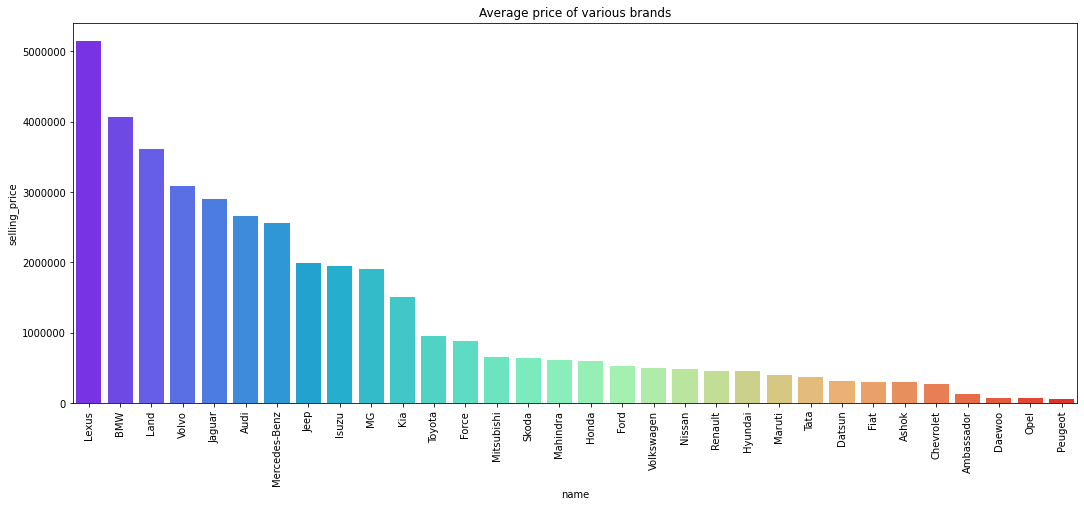

In [ ]:
plt.figure(figsize = (18, 7))

sns.barplot(x = 'name', y = 'selling_price', data = avg_price, palette = 'rainbow')
_ = plt.xticks(rotation = 90, fontweight = 'light')
plt.title('Average price of various brands')
plt.ticklabel_format(style = 'plain', axis ='y')
plt.show()

 Lexus, BMW, Volvo, Land etc are some of the costliest used cars.

*  Does the type of seller affect the price of the cars?

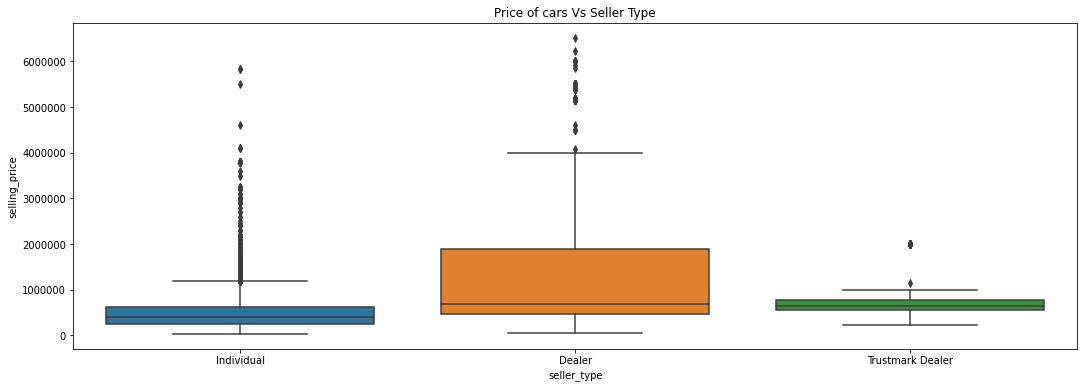

In [ ]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'seller_type', y = 'selling_price', data = train )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Seller Type')
plt.show()

In [ ]:
train.groupby('seller_type')['selling_price'].describe()


,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,820.0,1.455258e+06,1.583625e+06,60000.0,468750.0,696500.0,1900000.0,6523000.0
Individual,5005.0,4.976854e+05,4.618422e+05,30000.0,240000.0,400000.0,620000.0,5830000.0
Trustmark Dealer,174.0,7.955805e+05,5.049063e+05,225000.0,550000.0,650000.0,779000.0,2000000.0


Here we can see that most of the cars are sold individually when it comes to selling price, the amount generated by a dealer is more greater than the amount generated individually.


*  Does the number of owners affect the price of cars?

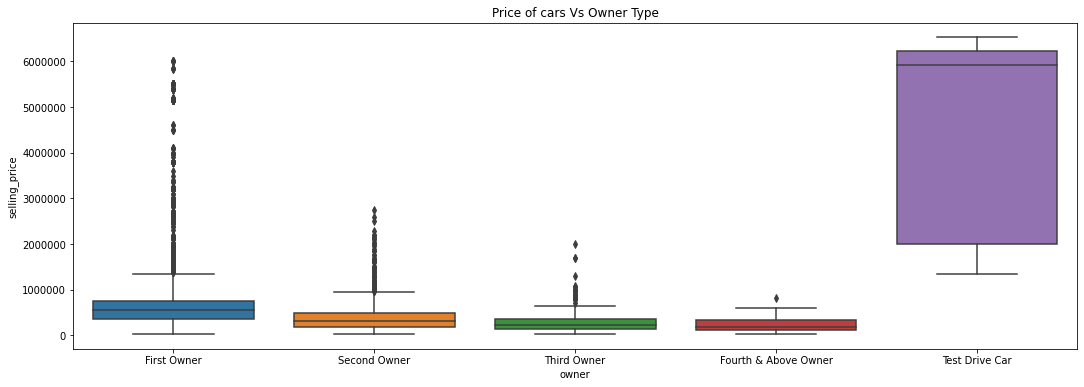

In [ ]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'owner', y = 'selling_price', data = train )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Owner Type')
plt.show()


In [ ]:
train.groupby('owner')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
First Owner,3903.0,7.814549e+05,9.180855e+05,30000.0,350000.0,550000.0,755000.0,6000000.0
Fourth & Above Owner,119.0,2.315798e+05,1.484345e+05,40000.0,121000.0,180000.0,340000.0,810000.0
Second Owner,1558.0,3.889115e+05,3.173404e+05,35000.0,190000.0,310000.0,500000.0,2750000.0
Test Drive Car,5.0,4.403800e+06,2.510598e+06,1350000.0,2000000.0,5923000.0,6223000.0,6523000.0
Third Owner,414.0,2.829433e+05,2.342715e+05,30000.0,142000.0,222500.0,350000.0,2000000.0


We can see that as the number of owners for a car increases the selling price decreases eventually.

People are likely to buy cars that are owned by only one owner.

* Does fuel type affect the selling price of cars?

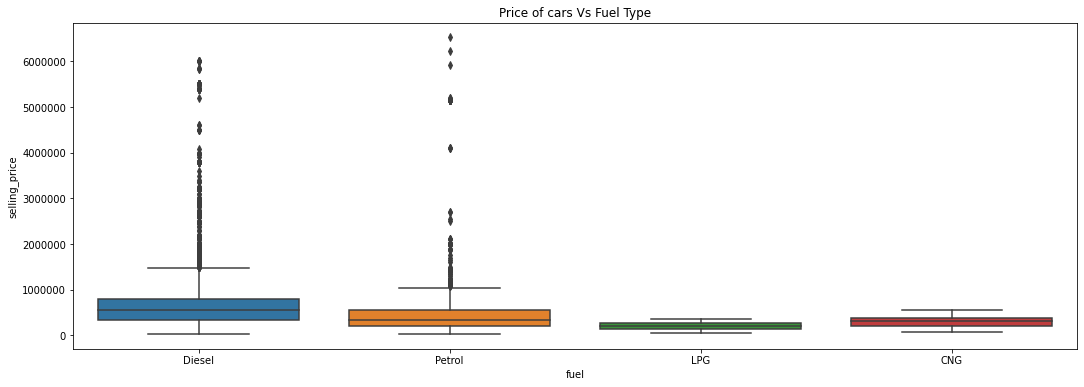

In [ ]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'fuel', y = 'selling_price', data = train )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Fuel Type')
plt.show()


In [ ]:
train.groupby('fuel')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
CNG,44.0,304636.295455,112947.543869,80000.0,200000.0,322500.0,382500.0,545000.0
Diesel,3265.0,787315.561103,895234.953549,40000.0,345000.0,550000.0,800000.0,6000000.0
LPG,27.0,196148.148148,79756.216880,54000.0,148500.0,200000.0,262500.0,350000.0
Petrol,2663.0,463151.660158,623524.236031,30000.0,200000.0,340000.0,550000.0,6523000.0


price of diesel cars are higher compared to other type of fuel type.

* Does number of seats affect the price of the car?

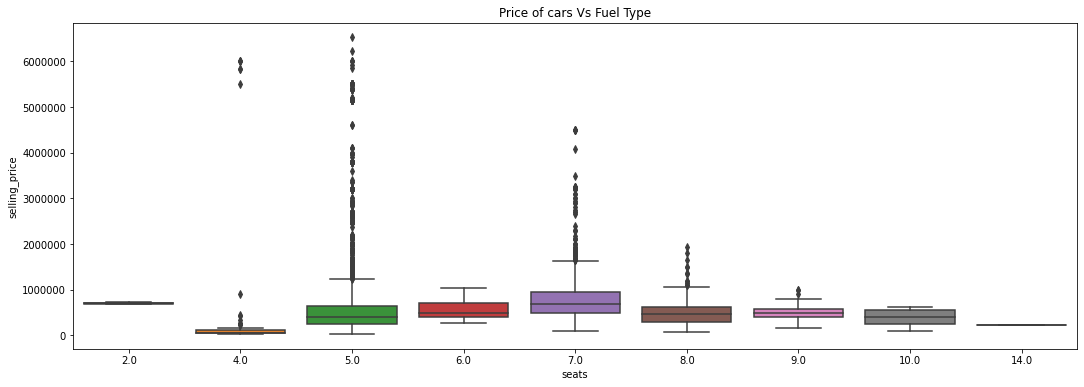

In [ ]:
plt.figure(figsize = (18,6))

sns.boxplot(x = 'seats', y = 'selling_price', data = train )
plt.ticklabel_format(style = 'plain', axis ='y')

plt.title('Price of cars Vs Fuel Type')
plt.show()

In [ ]:
train.groupby('seats')['selling_price'].describe()


,count,mean,std,min,25%,50%,75%,max
seats,,,,,,,,
2.0,2.0,700500.000000,3.040559e+04,679000.0,689750.00,700500.0,711250.0,722000.0
4.0,98.0,448374.510204,1.394139e+06,31504.0,45000.00,62000.0,107500.0,6000000.0
5.0,4749.0,615376.608339,8.282798e+05,30000.0,250000.00,409000.0,640000.0,6523000.0
6.0,49.0,579020.408163,2.194044e+05,280000.0,400000.00,500000.0,700000.0,1040000.0
7.0,842.0,825051.038005,6.029770e+05,96000.0,500000.00,692500.0,950000.0,4500000.0
8.0,175.0,528079.965714,3.310170e+05,80000.0,300000.00,465000.0,617500.0,1925000.0
9.0,68.0,489720.514706,1.819354e+05,150000.0,408499.25,491999.5,585000.0,999000.0
10.0,15.0,391866.466667,1.720319e+05,95000.0,254999.50,409999.0,544999.5,620000.0
14.0,1.0,235000.000000,NaN,235000.0,235000.00,235000.0,235000.0,235000.0


we can see that five and seven seater cars are most preferred cars by people. The main reason for it might be due to the space available

In [ ]:
pip install category_encoders

# PROCESSING DATA

In [ ]:
import category_encoders as ce

encoder = ce.TargetEncoder()
train_['name'] = encoder.fit_transform(train_['name'], train_['selling_price'])
test_['name'] = encoder.transform(test_['name'])

In [ ]:
test_.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,635844.116883,2016,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.50,153Nm@ 3800rpm,5.0
1,2,595635.791045,2017,35000,Petrol,Individual,Manual,First Owner,17.80,1497.0,117.30,145Nm@ 4600rpm,5.0
2,3,454209.346228,2014,80000,Petrol,Individual,Manual,First Owner,19.10,1197.0,82.00,114Nm@ 4000rpm,5.0
3,4,617766.346218,2014,145241,Diesel,Individual,Manual,First Owner,12.05,2179.0,120.00,290Nm@ 1800-2800rpm,7.0
4,5,521274.267361,2015,92651,Diesel,Dealer,Manual,First Owner,21.70,1498.0,98.96,215Nm@ 1750-2500rpm,5.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_owner=LabelEncoder()
train_['owner_n']=le_owner.fit_transform(train_['owner'])
test_['owner_n']=le_owner.fit_transform(test_['owner'])

In [ ]:
train_ = pd.get_dummies(train_,columns=['fuel','transmission','seller_type'],drop_first=True)
test_ = pd.get_dummies(test_,columns=['fuel','transmission','seller_type'],drop_first=True)

In [ ]:
train_['seats'] = train_['seats'].fillna(train_['seats'].mode()[0])
train_.fillna(train_.mean())

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,owner_n,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,3.689275e+05,2018,850000,9500,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0,0,1,0,0,1,1,0
1,4.542093e+05,2018,750000,30000,First Owner,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0,0,1,0,0,1,1,0
2,9.519480e+05,2015,1500000,80000,Second Owner,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0,2,1,0,0,0,1,0
3,4.542093e+05,2015,795000,35000,First Owner,17.01,1591.0,121.30,154.9Nm@ 4200rpm,5.0,0,0,0,1,1,1,0
4,3.079082e+06,2019,3800000,20000,First Owner,18.00,1969.0,190.00,400Nm,5.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,4.033088e+05,2010,235000,50000,First Owner,19.00,998.0,66.10,90Nm@ 3500rpm,5.0,0,0,0,1,1,1,0
5996,4.033088e+05,2018,390000,40000,First Owner,26.60,998.0,58.16,77Nm@ 3500rpm,5.0,0,0,0,0,1,1,0
5997,3.689275e+05,2018,450000,75000,First Owner,20.30,1199.0,84.00,114Nm@ 3500rpm,5.0,0,0,0,1,1,1,0
5998,6.177663e+05,2011,250000,100000,Second Owner,15.96,2523.0,63.00,180Nm@ 1440-1500rpm,9.0,2,1,0,0,1,1,0


In [ ]:
test_['seats'] = test_['seats'].fillna(test_['seats'].mode()[0])
test_.fillna(test_.mean())

,Id,name,year,km_driven,owner,mileage,engine,max_power,torque,seats,owner_n,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,1,635844.116883,2016,11000,First Owner,14.30,1598.0,103.50,153Nm@ 3800rpm,5.0,0,0,0,1,0,0,0
1,2,595635.791045,2017,35000,First Owner,17.80,1497.0,117.30,145Nm@ 4600rpm,5.0,0,0,0,1,1,1,0
2,3,454209.346228,2014,80000,First Owner,19.10,1197.0,82.00,114Nm@ 4000rpm,5.0,0,0,0,1,1,1,0
3,4,617766.346218,2014,145241,First Owner,12.05,2179.0,120.00,290Nm@ 1800-2800rpm,7.0,0,1,0,0,1,1,0
4,5,521274.267361,2015,92651,First Owner,21.70,1498.0,98.96,215Nm@ 1750-2500rpm,5.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,454209.346228,2020,2000,First Owner,20.70,1197.0,81.86,113.75Nm@ 4000rpm,5.0,0,0,0,1,1,0,0
2124,2125,403308.812500,2018,100000,Second Owner,28.40,1248.0,74.02,190Nm@ 2000rpm,5.0,2,1,0,0,1,1,0
2125,2126,368927.489011,2011,172000,Second Owner,17.88,1396.0,52.80,85Nm@ 2500rpm,5.0,2,1,0,0,1,1,0
2126,2127,454209.346228,2017,47000,Second Owner,19.67,1582.0,126.20,259.9Nm@ 1900-2750rpm,5.0,2,1,0,0,1,1,0


In [ ]:
train_.drop(['owner', 'torque'], axis=1, inplace=True)

In [ ]:
train_.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,owner_n,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,3.689275e+05,2018,850000,9500,21.50,1497.0,108.50,5.0,0,1,0,0,1,1,0
1,4.542093e+05,2018,750000,30000,21.19,1396.0,88.76,5.0,0,1,0,0,1,1,0
2,9.519480e+05,2015,1500000,80000,12.55,2982.0,168.50,7.0,2,1,0,0,0,1,0
3,4.542093e+05,2015,795000,35000,17.01,1591.0,121.30,5.0,0,0,0,1,1,1,0
4,3.079082e+06,2019,3800000,20000,18.00,1969.0,190.00,5.0,0,1,0,0,0,1,0


In [ ]:
test_.drop(['Id', 'owner', 'torque'], axis=1, inplace=True)

In [ ]:
test_.head()

,name,year,km_driven,mileage,engine,max_power,seats,owner_n,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,635844.116883,2016,11000,14.30,1598.0,103.50,5.0,0,0,0,1,0,0,0
1,595635.791045,2017,35000,17.80,1497.0,117.30,5.0,0,0,0,1,1,1,0
2,454209.346228,2014,80000,19.10,1197.0,82.00,5.0,0,0,0,1,1,1,0
3,617766.346218,2014,145241,12.05,2179.0,120.00,7.0,0,1,0,0,1,1,0
4,521274.267361,2015,92651,21.70,1498.0,98.96,5.0,0,1,0,0,1,0,0


In [ ]:
target = train_['selling_price']

In [ ]:
input = train_.drop(['selling_price'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 0)

# MODEL SELECTION

**After many submissions, I used many models with many many ways to tune hyperparameters and saw that LGBM Regressor is the best model for this dataset. Using Randomized Search CV is better than Grid Search CV on the test.**

In [ ]:
from lightgbm import LGBMRegressor
import sklearn.metrics as metrics

lgbmr = LGBMRegressor()

lgbmr.fit(X_train, y_train)
lgbmr.score(X_test,y_test)
yhat_lgbmr = lgbmr.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat_lgbmr)))
print('Score: ',lgbmr.score(X_train, y_train))

RMSE: 107346.27557073647
Score:  0.987763345982856


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500]
}

rs = RandomizedSearchCV(LGBMRegressor(random_state=0), params, scoring='r2', cv=5)
rs.fit(X_train, y_train)
md = rs.best_estimator_
yhat = md.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))
print('Score: ',md.score(X_train, y_train))

RMSE: 105108.32323889503
Score:  0.9923249594403867


In [ ]:
md.score(X_test, y_test)

0.9819587909103158

In [ ]:
pred = md.predict(test_)
pred

array([647162.43280905, 786020.10397771, 403183.09139362, ...,
       140495.59153881, 966554.75460479, 345663.79122704])

In [ ]:
submission = pd.DataFrame({'Id':test.index,'Predicted':pred}) 
submission.Id = submission.Id.apply(lambda x: x+1)
submission.head(10)

,Id,Predicted
0,1,647162.432809
1,2,786020.103978
2,3,403183.091394
3,4,588905.978079
4,5,612273.090805
5,6,88051.609429
6,7,129128.864398
7,8,266203.868705
8,9,235603.241018
9,10,653295.175037


In [ ]:
from google.colab import files 
file = 'submission.csv'
submission.to_csv(file, index=False)
files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>